## **Importing Libraries**

In [18]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
import re
import seaborn as sns

In [110]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
from ultralytics import YOLO
import torch
import torch.nn as nn
import torchvision.models as models
from torch.utils.data import DataLoader, Dataset
import torch.optim as optim
from torchvision import transforms
from tensorflow.python.keras.utils import np_utils
import torchvision.transforms as T
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [111]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense, Input, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## **Loading the dataset**

In [4]:
data_path=r'Dataset\\Train File'

images = []
labels = []
        
for file in sorted(os.listdir(data_path)):
    if file.lower().endswith((".jpg", ".jpeg")):
        # Read and preprocess the image
        img = cv2.imread(os.path.join(data_path, file))
        img = cv2.cvtColor(cv2.resize(img, (224, 224)), cv2.COLOR_BGR2RGB)
        images.append(img)
        
        # Replace and correct the filenames
        file = file.replace("Hog Pulm", "HogPlum").replace("HogPulm", "HogPlum").replace("Lichi", "Litchi")
        labels.append(re.findall("[a-zA-Z]+", file)[0])
        
path = r"Dataset\\Test File"

for file in sorted(os.listdir(path)):
    if file.endswith(".jpg") or file.endswith(".jpeg"):
        img = cv2.cvtColor(cv2.resize(cv2.imread(os.path.join(path, file)), (224, 224)), cv2.COLOR_BGR2RGB)
        images.append(img)
        labels.append(re.findall("[a-zA-Z]+", file)[0])
        
data = np.array(images)
target = np.array(labels)

In [5]:
print(data.shape, target.shape)

(400, 224, 224, 3) (400,)


## **Visualization of data**

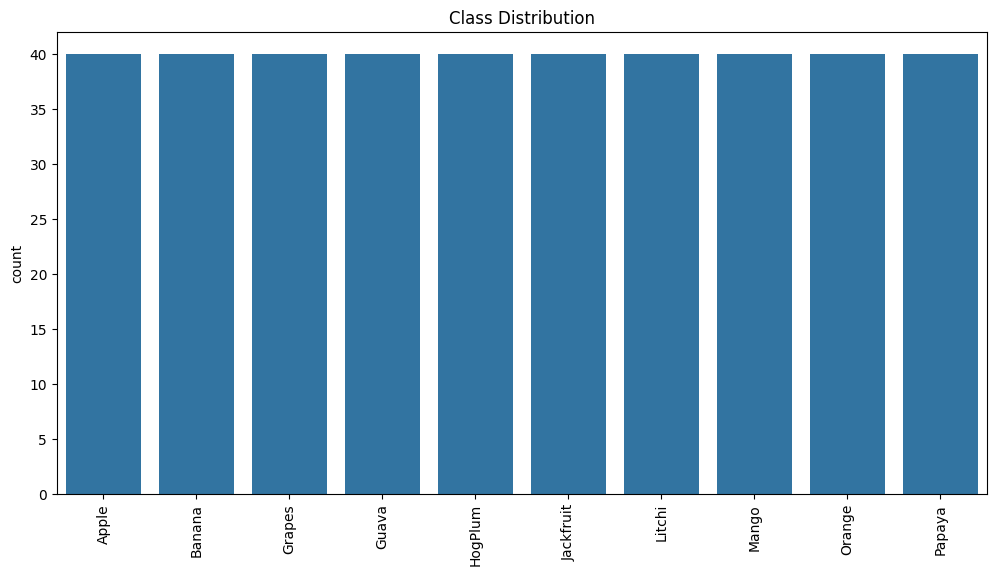

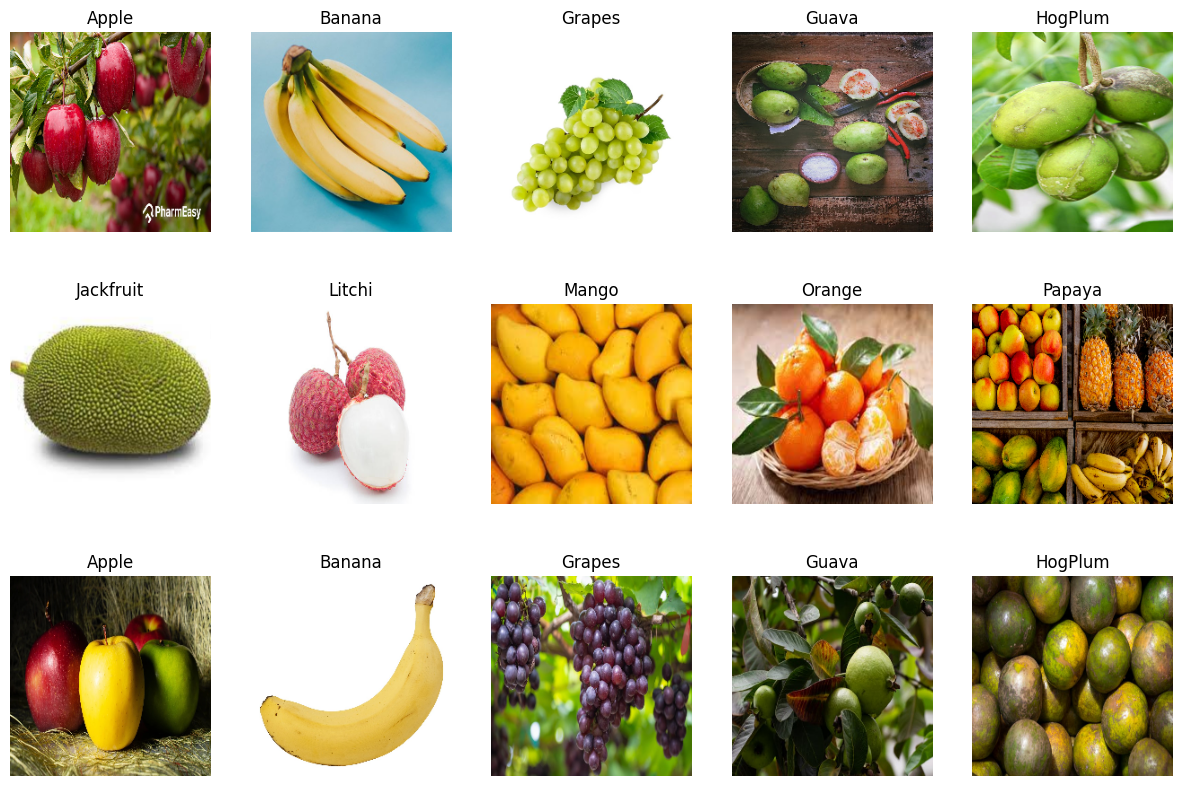

In [6]:
# Plotting the distribution of classes
plt.figure(figsize=(12, 6))
sns.countplot(x=target)
plt.title('Class Distribution')
plt.xticks(rotation=90)
plt.show()

# Displaying sample images
fig, axes = plt.subplots(3, 5, figsize=(15, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.set_title(labels[i])
    ax.axis('off')
plt.show()

## **Data Augmentation**

In [88]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [89]:
data_augment = []
target_augment = []
for i in range(data.shape[0]):
    img = data[i]
    label = target[i]
    img = img.reshape((1,) + img.shape)
    target_arr = np.array([label])

    for img_aug, label_aug in datagen.flow(img, target_arr, batch_size=1):
        data_augment.append(img_aug[0])
        target_augment.append(label_aug[0])
        break

### Converting to arrays

In [90]:
data_augment = np.array(data_augment)
target_augment = np.array(target_augment)

### Normalization

In [91]:
data_augment = data_augment / 255.0

### Label Encoding

In [92]:
label_encoder = LabelEncoder()
target_augment_int = label_encoder.fit_transform(target_augment)

### One-Hot Encoding

In [93]:
target_augment= np_utils.to_categorical(target_augment_int)

### Visualzation of Augmented data

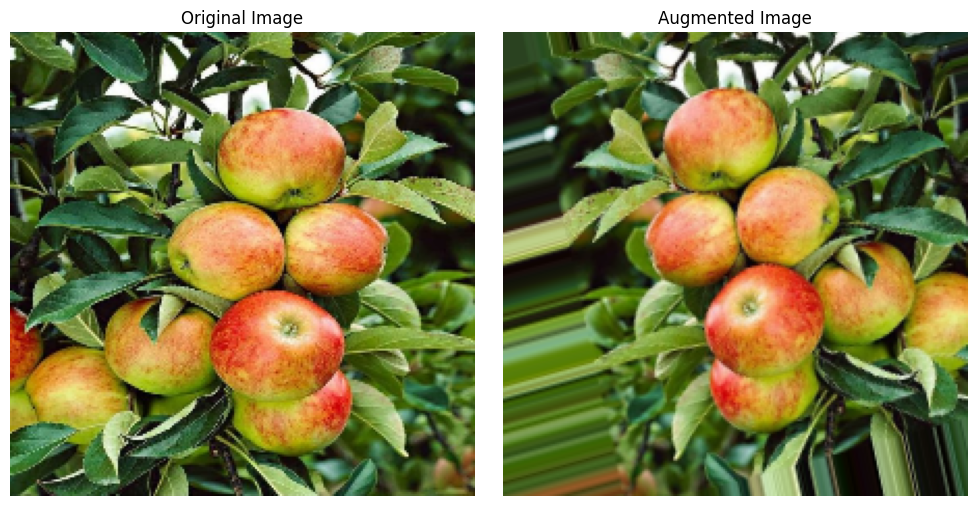

In [94]:
visualize_index = 250

plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(data[visualize_index])
plt.title("Original Image")
plt.axis('off')

# Augmented image
plt.subplot(1, 2, 2)
plt.imshow(data_augment[visualize_index])
plt.title("Augmented Image")
plt.axis('off')

plt.tight_layout()
plt.show()

## **Train/Test Split**

In [124]:
train_data, test_data, train_target, test_target = train_test_split(data_augment, target_augment, test_size=0.2, random_state=42)

## **Model 1 -- YOLO**

In [8]:

model = YOLO('yolov8n.yaml') 
model.train(data='Dataset\dataset.yaml', epochs=10, imgsz=640)  

New https://pypi.org/project/ultralytics/8.2.48 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.46  Python-3.11.9 torch-2.3.1+cpu CPU (Intel Core(TM) i7-6500U 2.50GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=Dataset\dataset.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_

train: Scanning C:\Users\HP\Desktop\AHB18434_05\Dataset\Train File.cache... 301 images, 19 backgrounds, 0 corrupt: 100%|██████████| 320/320 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning C:\Users\HP\Desktop\AHB18434_05\Dataset\Test File.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]

Plotting labels to runs\detect\train3\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train3
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G       2.64      5.311      4.256         18        640: 100%|██████████| 20/20 [05:41<00:00, 17.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:37<00:00, 12.43s/it]

                   all         80         80    0.00546      0.338     0.0081    0.00225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      2.623      5.161      4.218         17        640: 100%|██████████| 20/20 [07:15<00:00, 21.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:38<00:00, 12.89s/it]

                   all         80         80    0.00498      0.312    0.00783    0.00207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      2.667       5.05       4.17         23        640: 100%|██████████| 20/20 [07:09<00:00, 21.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:36<00:00, 12.08s/it]

                   all         80         80    0.00517      0.325     0.0231    0.00366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      2.651      4.778      4.066         24        640: 100%|██████████| 20/20 [05:29<00:00, 16.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:35<00:00, 11.74s/it]

                   all         80         80    0.00521      0.325     0.0199    0.00457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      2.691      4.569      3.996         19        640: 100%|██████████| 20/20 [05:24<00:00, 16.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:36<00:00, 12.02s/it]

                   all         80         80    0.00609      0.263    0.00991    0.00255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      2.606      4.295       3.84         23        640: 100%|██████████| 20/20 [05:50<00:00, 17.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:41<00:00, 13.83s/it]

                   all         80         80     0.0116       0.15    0.00762    0.00229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      2.684       4.21      3.772         17        640: 100%|██████████| 20/20 [06:37<00:00, 19.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:35<00:00, 11.70s/it]

                   all         80         80      0.015      0.075     0.0113    0.00319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      2.598      4.114      3.686         17        640: 100%|██████████| 20/20 [05:14<00:00, 15.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:35<00:00, 11.72s/it]

                   all         80         80       0.02     0.0625    0.00891    0.00305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      2.652      4.034      3.657         19        640: 100%|██████████| 20/20 [05:22<00:00, 16.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:34<00:00, 11.66s/it]

                   all         80         80       0.02      0.075     0.0119    0.00378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      2.589      3.971      3.601         16        640: 100%|██████████| 20/20 [05:23<00:00, 16.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:37<00:00, 12.61s/it]

                   all         80         80     0.0233      0.312     0.0263    0.00907



10 epochs completed in 1.104 hours.
Optimizer stripped from runs\detect\train3\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train3\weights\best.pt, 6.2MB

Validating runs\detect\train3\weights\best.pt...
Ultralytics YOLOv8.2.46  Python-3.11.9 torch-2.3.1+cpu CPU (Intel Core(TM) i7-6500U 2.50GHz)
YOLOv8n summary (fused): 168 layers, 3007598 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:31<00:00, 10.64s/it]


                   all         80         80     0.0233      0.312     0.0263    0.00909
                Banana         80         80     0.0233      0.312     0.0263    0.00909
Speed: 5.8ms preprocess, 260.3ms inference, 0.0ms loss, 10.5ms postprocess per image
Results saved to runs\detect\train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001909F56FA90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [152]:
results = model(test_data)
results

<tf.Tensor: shape=(80, 10), dtype=float32, numpy=
array([[  0.0015041,  0.00052277,     0.64515,     0.05826,    0.012604,   0.0040835,   0.0067302,    0.068216,    0.047476,     0.15545],
       [    0.99991,  3.1131e-07,  4.1596e-05,  2.9658e-06,  3.3918e-05,    3.48e-08,  5.3273e-06,  5.1714e-06,  1.5698e-06,  1.1405e-06],
       [  0.0016398,   0.0084792,    0.012305,     0.65827,    0.056926,  0.00027275,     0.05479,     0.20421,   0.0017098,    0.001395],
       [    0.99981,  1.1447e-06,  0.00014036,  2.0019e-05,  9.2259e-06,  1.0925e-07,  3.8618e-06,   4.242e-06,  3.2043e-06,  6.2892e-06],
       [ 3.4501e-05,   0.0023614,  0.00018803,    0.036377,      0.9436,  0.00086173,  1.1018e-05,  0.00035184,  2.1817e-05,    0.016193],
       [  0.0020065,   0.0013941,    0.007156,    0.015821,     0.70024,    0.016683,     0.00198,    0.013777,   0.0013788,     0.23956],
       [ 0.00027168,     0.87343,   0.0009144,   0.0022951,   0.0046893,    0.036749,  0.00048505,    0.039545,   0.

## **Model 2**

### Building the Model

In [106]:
model1 = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 173056)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │    44,302,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,675,978 (170.43 MB)

 Trainable params: 44,675,978 (170.43 MB)

 Non-trainable params: 0 (0.00 B)

In [107]:
history1 = model1.fit(train_data, train_target, batch_size=32,
                      validation_data=(data_augment, target_augment),
                      epochs=20)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 134s 11s/step - accuracy: 0.0752 - loss: 3.5694 - val_accuracy: 0.1225 - val_loss: 2.2746
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 104s 11s/step - accuracy: 0.1375 - loss: 2.2813 - val_accuracy: 0.1325 - val_loss: 2.2639
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 106s 11s/step - accuracy: 0.1798 - loss: 2.2395 - val_accuracy: 0.2575 - val_loss: 2.0961
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 99s 10s/step - accuracy: 0.2850 - loss: 2.0945 - val_accuracy: 0.3625 - val_loss: 1.9514
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 98s 10s/step - accuracy: 0.3022 - loss: 1.9861 - val_accuracy: 0.4975 - val_loss: 1.6824
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 147s 10s/step - accuracy: 0.3896 - loss: 1.7338 - val_accuracy: 0.5000 - val_loss: 1.5834
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 238s 25s/step - accuracy: 0.4505 - loss: 1.5651 - val_accuracy: 0.5700 - val_loss: 1.3465
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 283s 29s/step - accuracy: 0.5541 - loss: 1.2527 - val_accuracy: 0.67

### Predictions

In [125]:
model1_pred_probs = model1.predict(test_data)
model1_pred_probs[0]

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step


array([    0.12255,     0.11524,     0.30713,   0.0051175,     0.27171,    0.067202,   0.0014798,    0.021556,    0.038938,    0.049071], dtype=float32)

In [130]:
model1_pred = np.argmax(model1_pred_probs,1)

In [131]:
model1_pred

array([2, 0, 6, 0, 4, 3, 4, 9, 3, 6, 7, 1, 6, 3, 6, 0, 2, 6, 3, 7, 4, 3, 5, 1, 6, 6, 1, 3, 4, 2, 8, 7, 1, 3, 5, 6, 0, 3, 8, 3, 9, 5, 0, 7, 7, 2, 7, 8, 7, 3, 6, 3, 1, 6, 4, 2, 3, 2, 0, 4, 3, 7, 4, 7, 4, 6, 4, 8, 9, 4, 6, 2, 2, 7, 8, 4, 2, 8, 2, 8], dtype=int64)

### Evaluation

##### 1) Model Performance

Text(0, 0.5, 'loss')

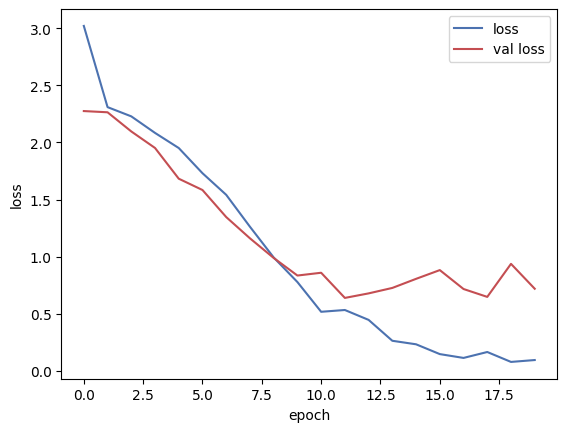

In [112]:
plt.plot(history1.history['loss'],'b',label='loss')
plt.plot(history1.history['val_loss'],'r',label='val loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

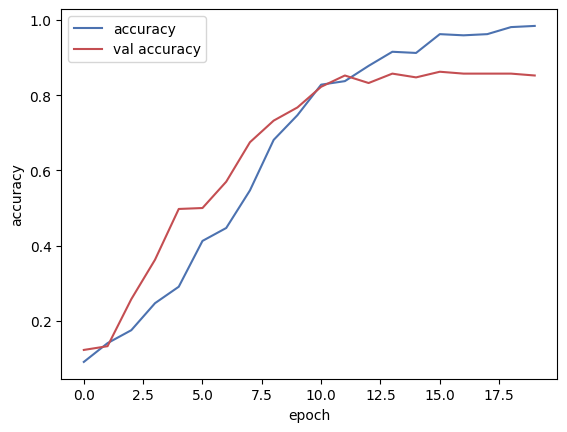

In [113]:
plt.plot(history1.history['accuracy'],'b',label='accuracy')
plt.plot(history1.history['val_accuracy'],'r',label='val accuracy')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')

In [114]:
print(model1.evaluate(test_data,test_target))

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.2680 - loss: 3.5366
[3.5732948780059814, 0.26249998807907104]


##### 2) classification report

In [135]:
test_target=np.argmax(test_target,1)
test_target

array([9, 0, 3, 0, 3, 4, 9, 4, 6, 6, 9, 1, 6, 2, 2, 2, 8, 6, 1, 5, 7, 5, 1, 1, 0, 6, 4, 5, 2, 4, 5, 3, 1, 7, 2, 6, 3, 2, 8, 1, 1, 5, 6, 5, 2, 2, 8, 1, 2, 3, 6, 1, 8, 0, 4, 9, 3, 2, 0, 2, 4, 4, 5, 8, 1, 1, 2, 8, 4, 3, 0, 0, 5, 5, 8, 6, 7, 9, 6, 9], dtype=int64)

In [136]:
clf_report_1 = classification_report(test_target, model1_pred)
print(clf_report_1)

              precision    recall  f1-score   support

           0       0.50      0.43      0.46         7
           1       0.60      0.27      0.38        11
           2       0.20      0.17      0.18        12
           3       0.15      0.29      0.20         7
           4       0.09      0.12      0.11         8
           5       0.33      0.11      0.17         9
           6       0.50      0.60      0.55        10
           7       0.00      0.00      0.00         3
           8       0.43      0.43      0.43         7
           9       0.00      0.00      0.00         6

    accuracy                           0.26        80
   macro avg       0.28      0.24      0.25        80
weighted avg       0.32      0.26      0.27        80



##### 3) confusion matrix

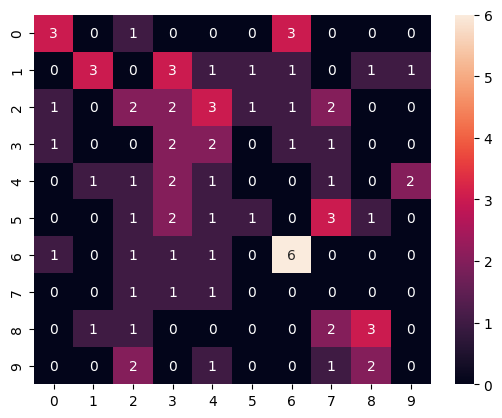

In [137]:
conf_matrix_1 = confusion_matrix(test_target, model1_pred)
sns.heatmap(conf_matrix_1, annot = True)
plt.show()

## **Model 3**

### Building the Model

In [75]:
baseModel = MobileNetV2(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))

headModel = baseModel.output
headModel = GlobalAveragePooling2D()(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(10, activation="softmax")(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)
for layer in baseModel.layers:
    layer.trainable = False

model.compile(loss="categorical_crossentropy", optimizer= Adam(learning_rate=0.0005),metrics=["accuracy"])
model.summary()

C:\Users\HP\AppData\Local\Temp\ipykernel_13316\474537821.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  baseModel = MobileNetV2(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,423,242 (9.24 MB)

 Trainable params: 165,258 (645.54 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

### Defining the model checkpoint

In [78]:
checkpoint = ModelCheckpoint('models/model-{epoch:03d}.keras', monitor='val_loss', save_best_only=True, mode='auto')

### Training the model

In [79]:
history = model.fit(train_data, train_target, validation_data=(data_augment, target_augment), epochs=40, batch_size=8, callbacks=[checkpoint])

Epoch 1/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 36s 726ms/step - accuracy: 0.1836 - loss: 2.5252 - val_accuracy: 0.7300 - val_loss: 1.2138
Epoch 2/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 26s 665ms/step - accuracy: 0.5654 - loss: 1.3407 - val_accuracy: 0.8400 - val_loss: 0.7224
Epoch 3/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 47s 822ms/step - accuracy: 0.7171 - loss: 0.8857 - val_accuracy: 0.8800 - val_loss: 0.5129
Epoch 4/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 29s 734ms/step - accuracy: 0.7992 - loss: 0.6379 - val_accuracy: 0.9275 - val_loss: 0.3751
Epoch 5/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 28s 699ms/step - accuracy: 0.8363 - loss: 0.5694 - val_accuracy: 0.9425 - val_loss: 0.2781
Epoch 6/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 44s 773ms/step - accuracy: 0.9028 - loss: 0.3335 - val_accuracy: 0.9375 - val_loss: 0.2605
Epoch 7/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 41s 761ms/step - accuracy: 0.8840 - loss: 0.3968 - val_accuracy: 0.9625 - val_loss: 0.1948
Epoch 8/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 32s 811ms/step - accuracy: 0.9235 - loss: 0.3241 - val_accu

### Predictions

In [138]:
model2_pred_probs = model.predict(test_data)
model2_pred_probs[0]

3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step


array([  0.0015041,  0.00052277,     0.64516,     0.05826,    0.012604,   0.0040835,   0.0067302,    0.068216,    0.047476,     0.15545], dtype=float32)

In [139]:
model2_pred = np.argmax(model2_pred_probs,1)

In [140]:
model2_pred

array([2, 0, 3, 0, 4, 4, 1, 4, 6, 6, 7, 1, 6, 2, 2, 2, 8, 6, 1, 5, 7, 5, 1, 1, 0, 6, 4, 5, 2, 9, 5, 3, 1, 4, 2, 6, 4, 2, 8, 1, 1, 5, 6, 5, 2, 2, 2, 1, 2, 3, 6, 1, 2, 0, 7, 9, 3, 2, 0, 2, 4, 4, 5, 8, 1, 1, 4, 8, 4, 4, 0, 0, 5, 5, 8, 0, 7, 9, 6, 1], dtype=int64)

### Evaluation

##### 1) Model Performance

Text(0, 0.5, 'loss')

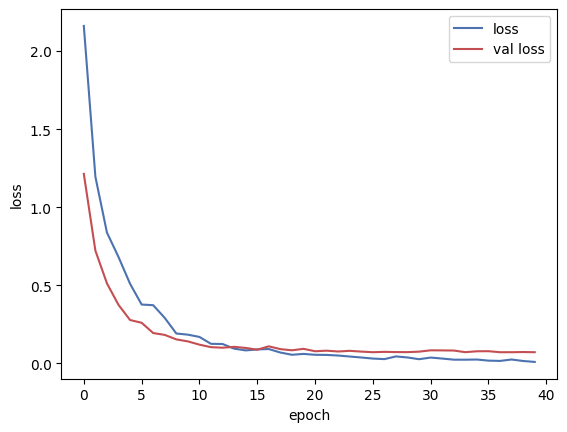

In [87]:
plt.plot(history.history['loss'],'b',label='loss')
plt.plot(history.history['val_loss'],'r',label='val loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

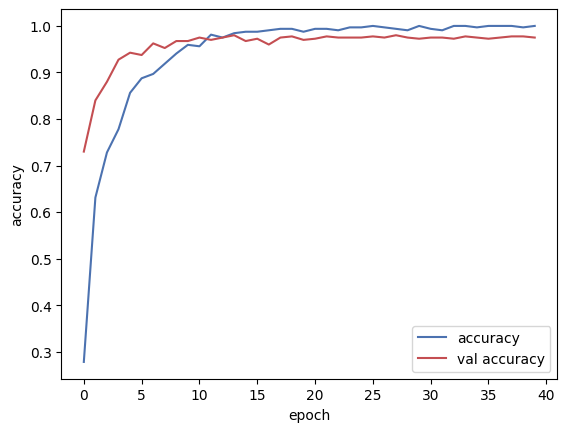

In [86]:
plt.plot(history.history['accuracy'],'b',label='accuracy')
plt.plot(history.history['val_accuracy'],'r',label='val accuracy')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')

In [85]:
print(model.evaluate(test_data,test_target))

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.8594 - loss: 0.4116
[0.354876846075058, 0.875]


##### 2) Classification Report

In [141]:
clf_report_2 = classification_report(test_target, model2_pred)
print(clf_report_2)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.85      1.00      0.92        11
           2       0.79      0.92      0.85        12
           3       1.00      0.57      0.73         7
           4       0.55      0.75      0.63         8
           5       1.00      1.00      1.00         9
           6       1.00      0.90      0.95        10
           7       0.50      0.67      0.57         3
           8       1.00      0.71      0.83         7
           9       0.67      0.33      0.44         6

    accuracy                           0.82        80
   macro avg       0.82      0.79      0.79        80
weighted avg       0.85      0.82      0.82        80



##### 3) Confusion Matrix

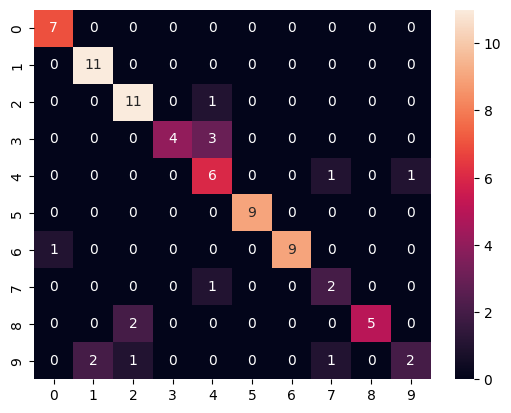

In [142]:
conf_matrix_2 = confusion_matrix(test_target, model2_pred)
sns.heatmap(conf_matrix_2, annot = True)
plt.show()

## **Visualising Predictions**

In [148]:
def visualize_predictions(images, true_labels, predicted_labels, n=10):
    plt.figure(figsize=(20, 10))
    for i in range(n):
        plt.subplot(2, n//2, i+1)
        plt.imshow(images[i])
        plt.title(f"True: {true_labels[i]}\nPredicted: {predicted_labels[i]}")
        plt.axis('off')
    plt.show()

### Custom Model 1

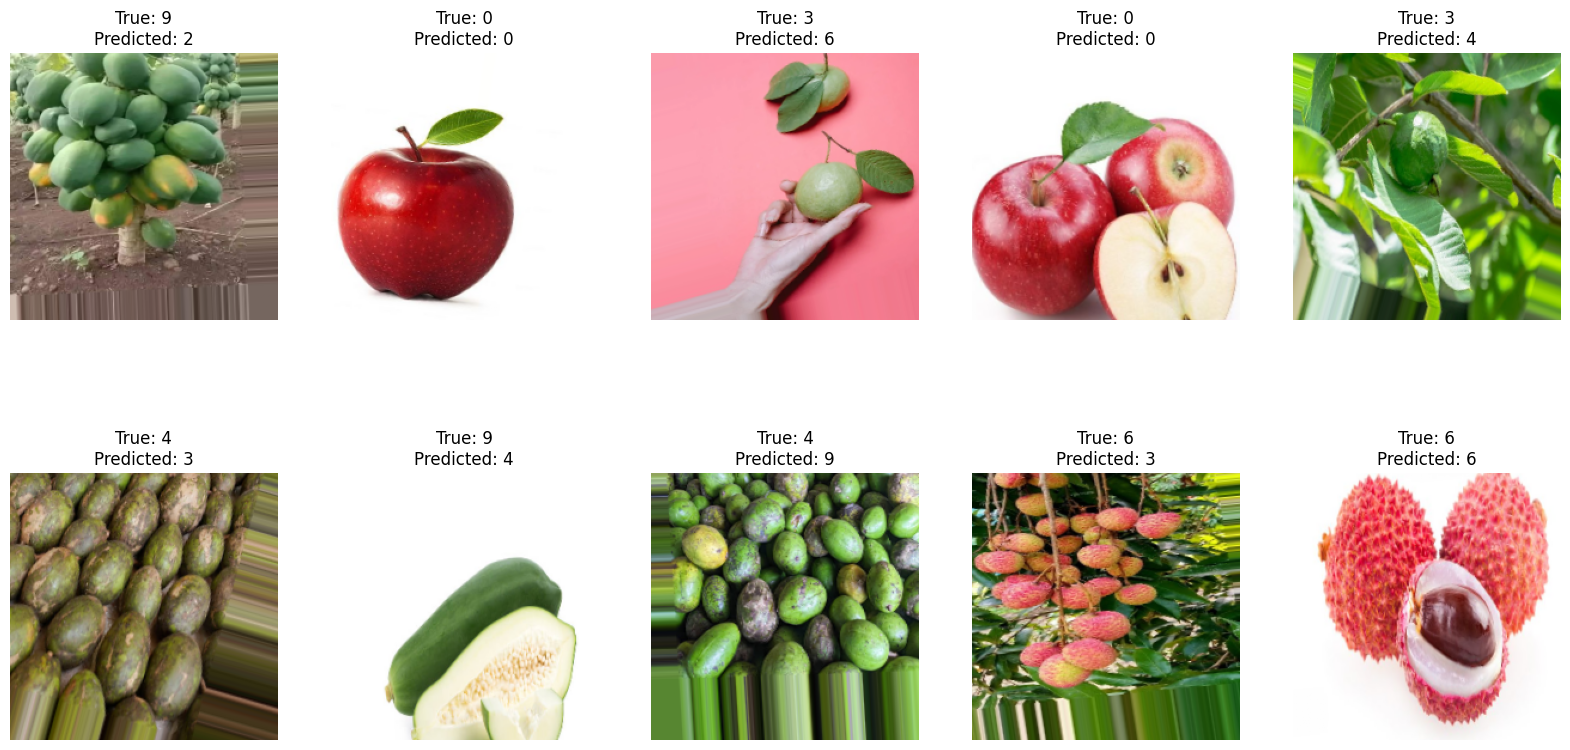

In [149]:
visualize_predictions(test_data, test_target, model1_pred)

### Custom model 2

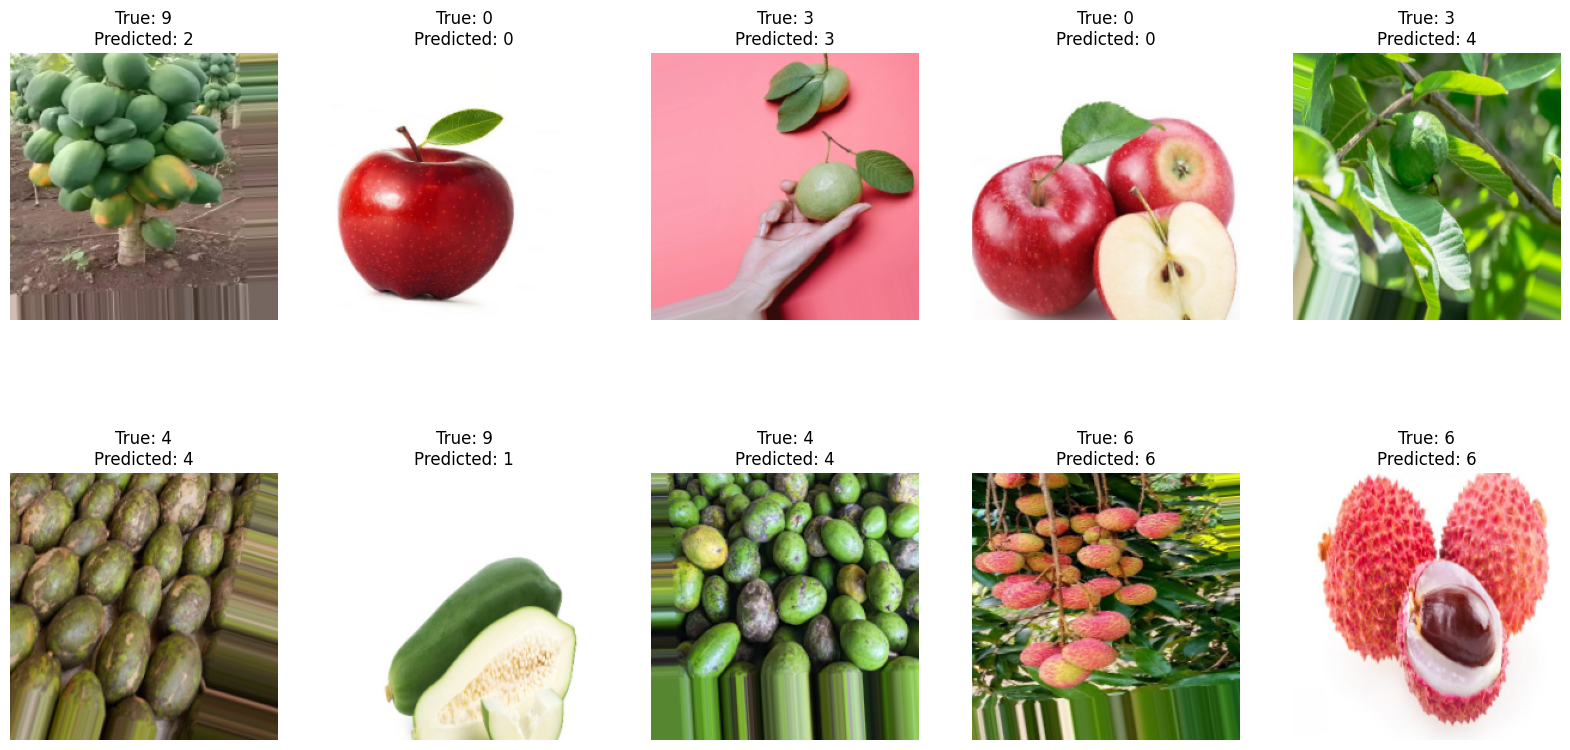

In [150]:
visualize_predictions(test_data, test_target, model2_pred)